In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('ds.csv', encoding= 'unicode_escape')

In [3]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24-02-2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07-05-2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01-07-2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25-08-2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28-10-2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,11-11-2018,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,18-11-2018,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,15-01-2019,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,20-02-2019,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,05-04-2019,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


In [4]:
df['CONTACT NAME'] = df['CONTACTFIRSTNAME'] + " " + df['CONTACTLASTNAME']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [6]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
CONTACT NAME            0
dtype: int64

In [7]:
df.describe(include="all")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CONTACT NAME
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747,2747,2747.000000,...,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,NaN,NaN,NaN,NaN,NaN,246,NaN,6,7,NaN,...,89,88,89,71,73,19,76,72,3,89
top,NaN,NaN,NaN,NaN,NaN,14-11-2018,NaN,Shipped,Classic Cars,NaN,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium,Diego Freyre
freq,NaN,NaN,NaN,NaN,NaN,38,NaN,2541,949,NaN,...,259,259,259,304,259,928,259,259,1349,259
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,NaN,1757.085912,NaN,NaN,100.691664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,91.877521,9.762135,42.042549,4.230544,1838.953901,NaN,819.280576,NaN,NaN,40.114802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,42.000000,NaN,NaN,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,NaN,1077.000000,NaN,NaN,68.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,NaN,1761.000000,NaN,NaN,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,NaN,2436.500000,NaN,NaN,124.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CONTACT NAME
0,10107,30,95.70,2,2871.00,24-02-2018,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,Kwai Yu
1,10121,34,81.35,5,2765.90,07-05-2018,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,Paul Henriot
2,10134,41,94.74,2,3884.34,01-07-2018,703,Shipped,Motorcycles,95,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,25-08-2018,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,Julie Young
4,10168,36,96.66,1,3479.76,28-10-2018,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,Juri Hirano
5,10180,29,86.13,9,2497.77,11-11-2018,573,Shipped,Motorcycles,95,...,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small,Martine Rance
6,10188,48,114.84,1,5512.32,18-11-2018,567,Shipped,Motorcycles,95,...,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium,Veysel Oeztan
7,10211,41,114.84,14,4708.44,15-01-2019,510,Shipped,Motorcycles,95,...,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium,Dominique Perrier
8,10223,37,107.18,1,3965.66,20-02-2019,475,Shipped,Motorcycles,95,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium,Peter Ferguson
9,10237,23,101.44,7,2333.12,05-04-2019,432,Shipped,Motorcycles,95,...,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small,Michael Frick


In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CONTACT NAME


array([[<AxesSubplot:title={'center':'ORDERNUMBER'}>,
        <AxesSubplot:title={'center':'QUANTITYORDERED'}>,
        <AxesSubplot:title={'center':'PRICEEACH'}>],
       [<AxesSubplot:title={'center':'ORDERLINENUMBER'}>,
        <AxesSubplot:title={'center':'SALES'}>,
        <AxesSubplot:title={'center':'DAYS_SINCE_LASTORDER'}>],
       [<AxesSubplot:title={'center':'MSRP'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

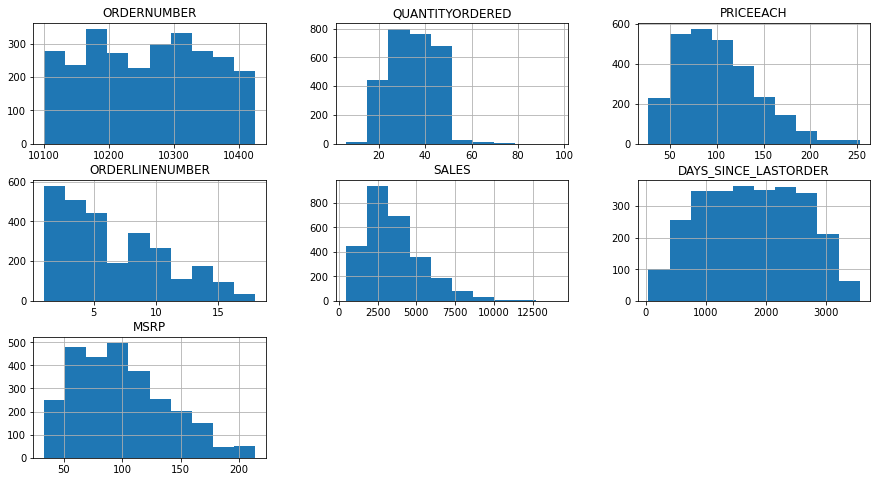

In [10]:
df.hist(figsize=(15,8))

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will 

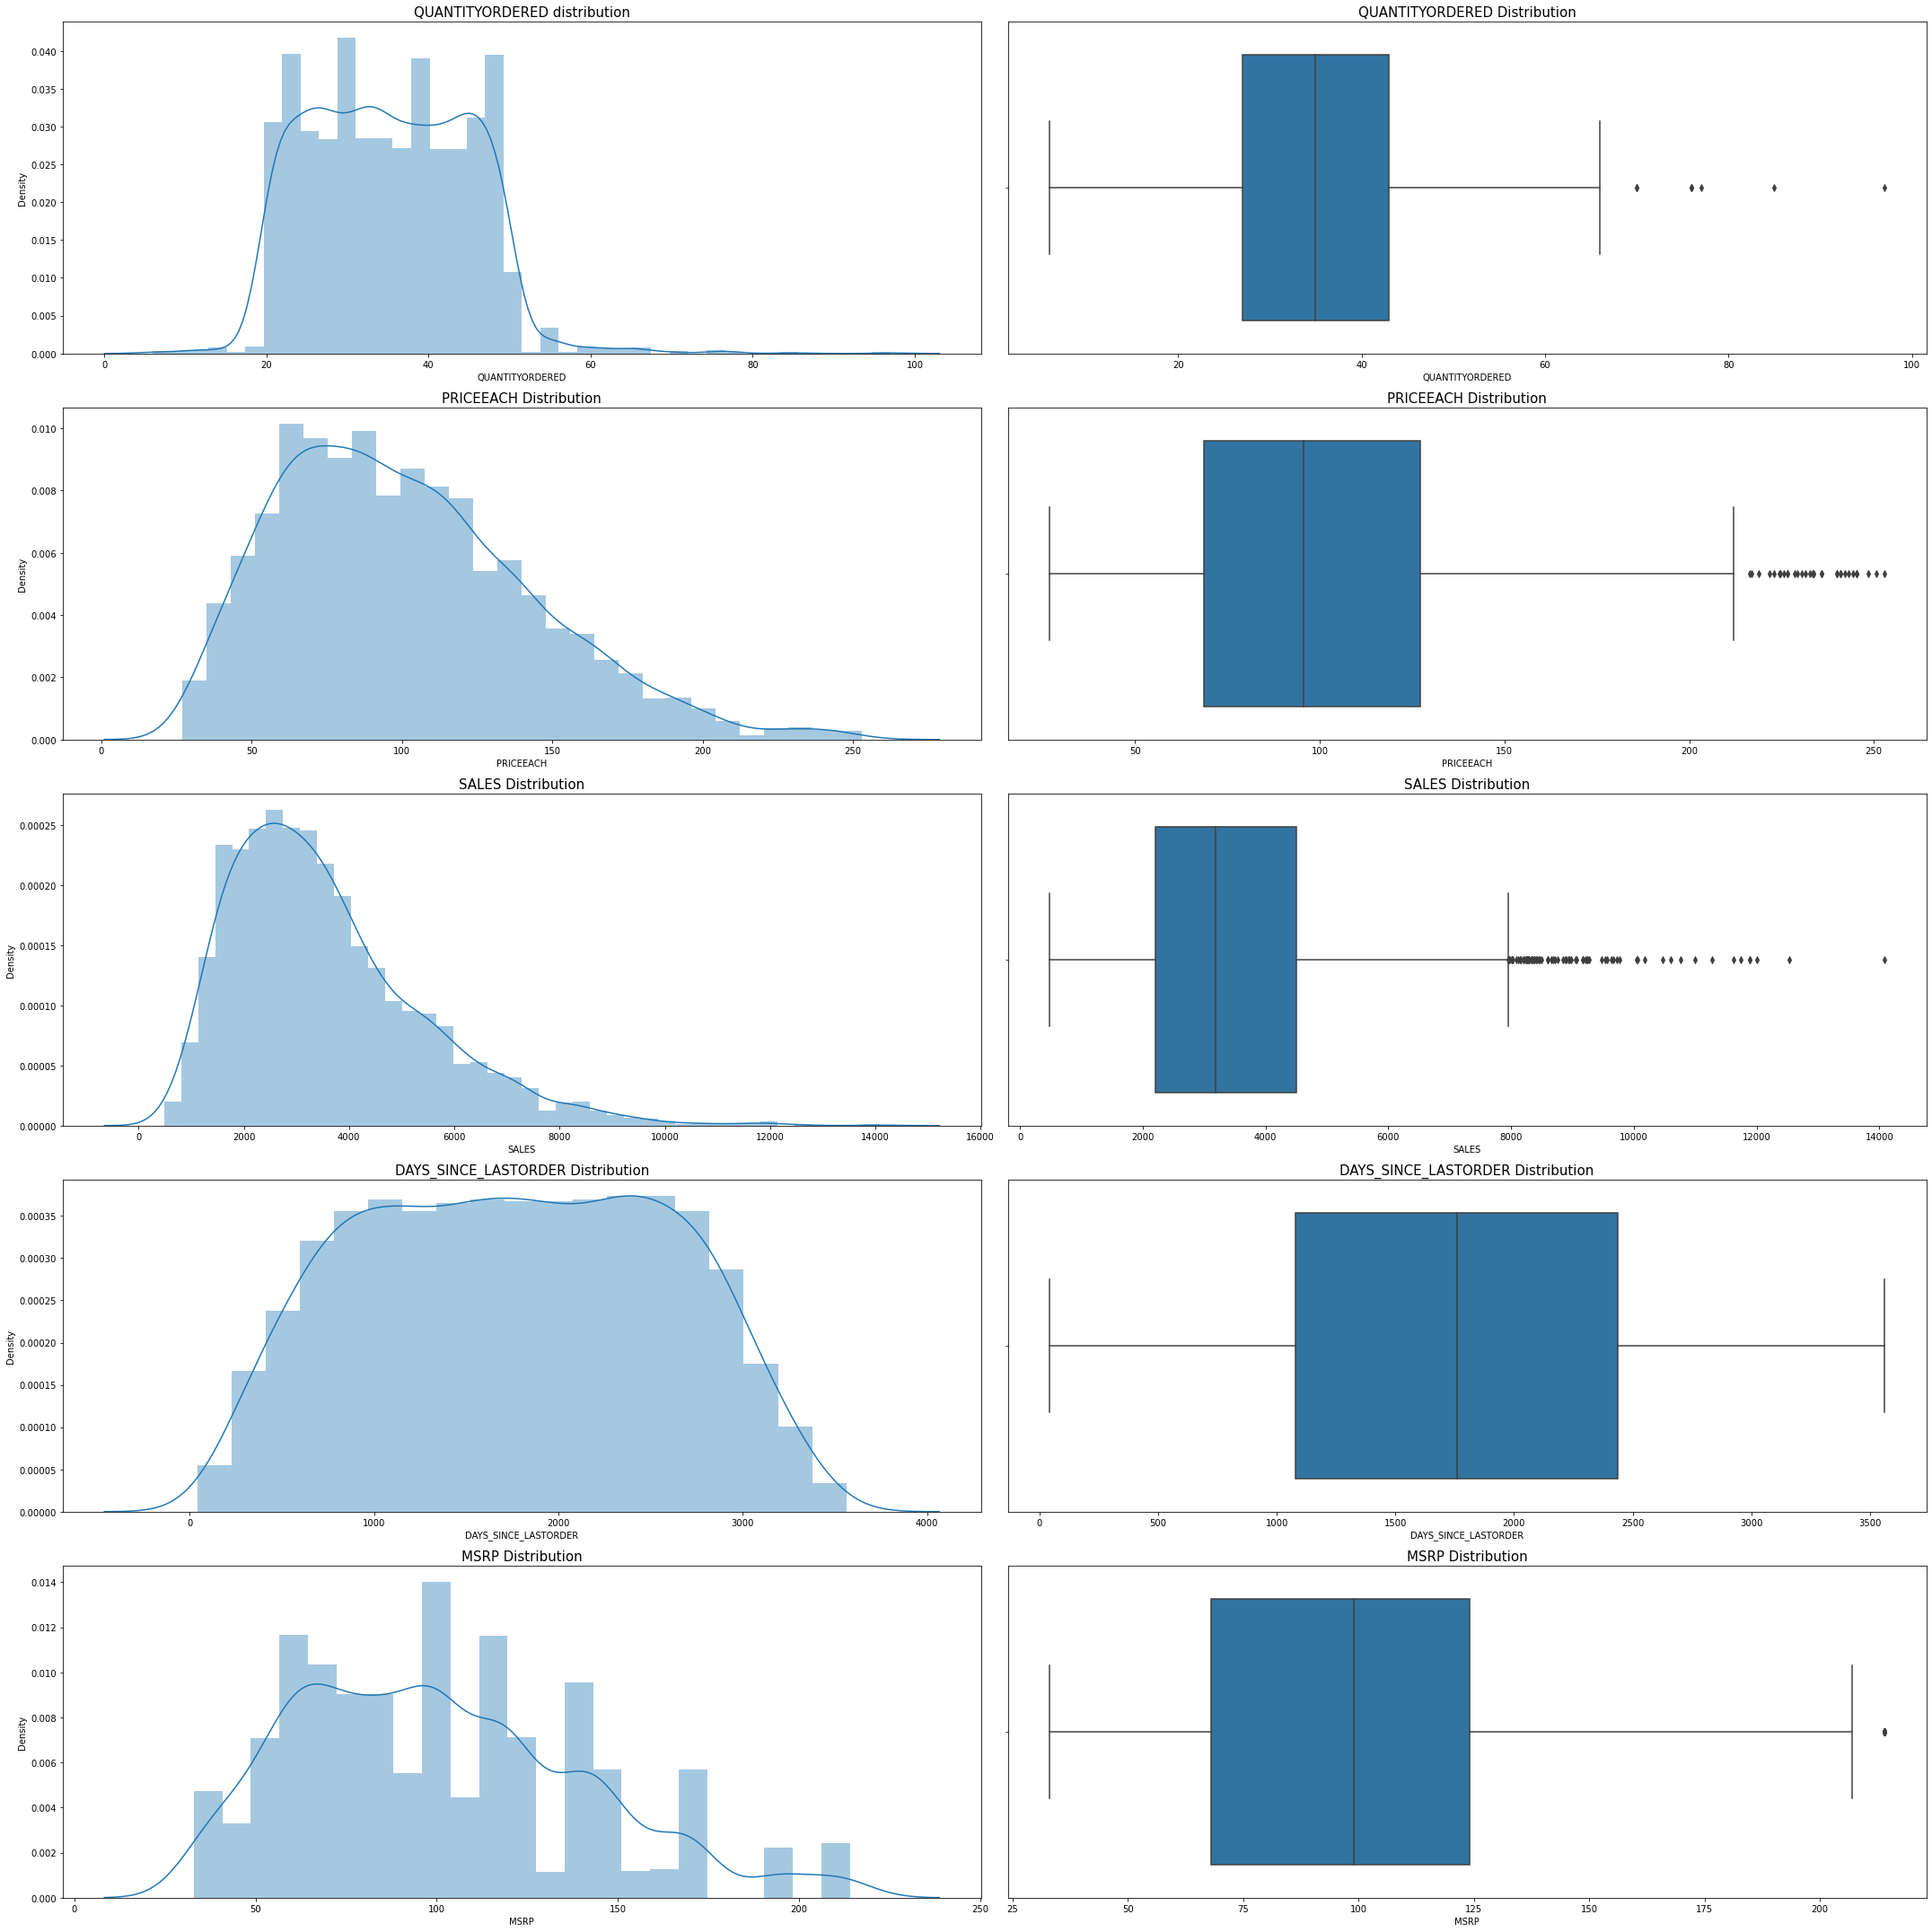

In [11]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(30,30)

a = sns.distplot(df['QUANTITYORDERED'] , ax=axes[0][0])
a.set_title("QUANTITYORDERED distribution",fontsize=15)

a = sns.boxplot(df['QUANTITYORDERED'] , orient = "v" , ax=axes[0][1])
a.set_title("QUANTITYORDERED Distribution",fontsize=15)

a = sns.distplot(df['PRICEEACH'] , ax=axes[1][0])
a.set_title("PRICEEACH Distribution",fontsize=15)

a = sns.boxplot(df['PRICEEACH'] , orient = "v" , ax=axes[1][1])
a.set_title("PRICEEACH Distribution",fontsize=15)

a = sns.distplot(df['SALES'] , ax=axes[2][0])
a.set_title("SALES Distribution",fontsize=15)

a = sns.boxplot(df['SALES'] , orient = "v" , ax=axes[2][1])
a.set_title("SALES Distribution",fontsize=15)


a = sns.distplot(df['DAYS_SINCE_LASTORDER'] , ax=axes[3][0])
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=15)

a = sns.boxplot(df['DAYS_SINCE_LASTORDER'] , orient = "v" , ax=axes[3][1])
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=15)

a = sns.distplot(df['MSRP'] , ax=axes[4][0])
a.set_title("MSRP Distribution",fontsize=15)

a = sns.boxplot(df['MSRP'] , orient = "v" , ax=axes[4][1])
a.set_title("MSRP Distribution",fontsize=15)

plt.tight_layout()
plt.show()

In [12]:
df.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397091,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397091,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


<AxesSubplot:>

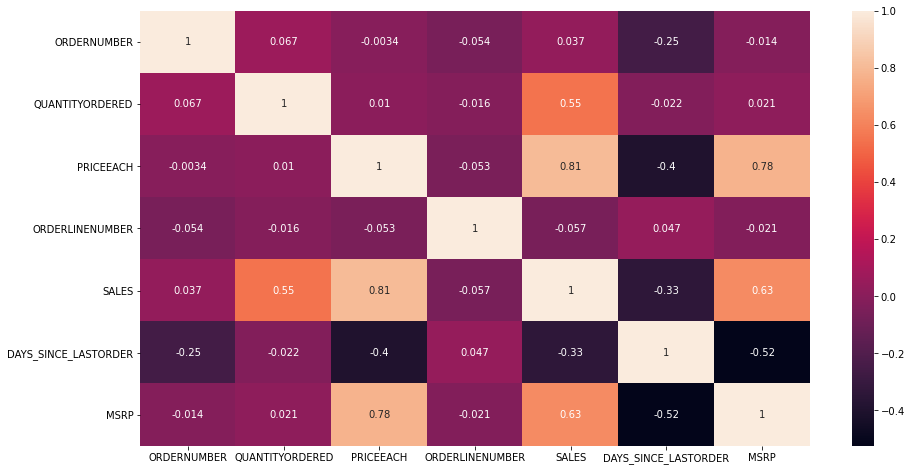

In [13]:
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

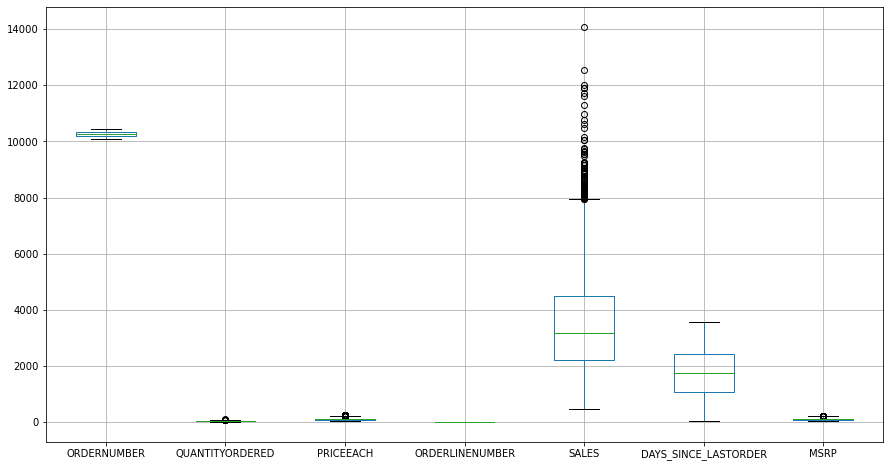

In [14]:
df.boxplot(figsize=(15,8))

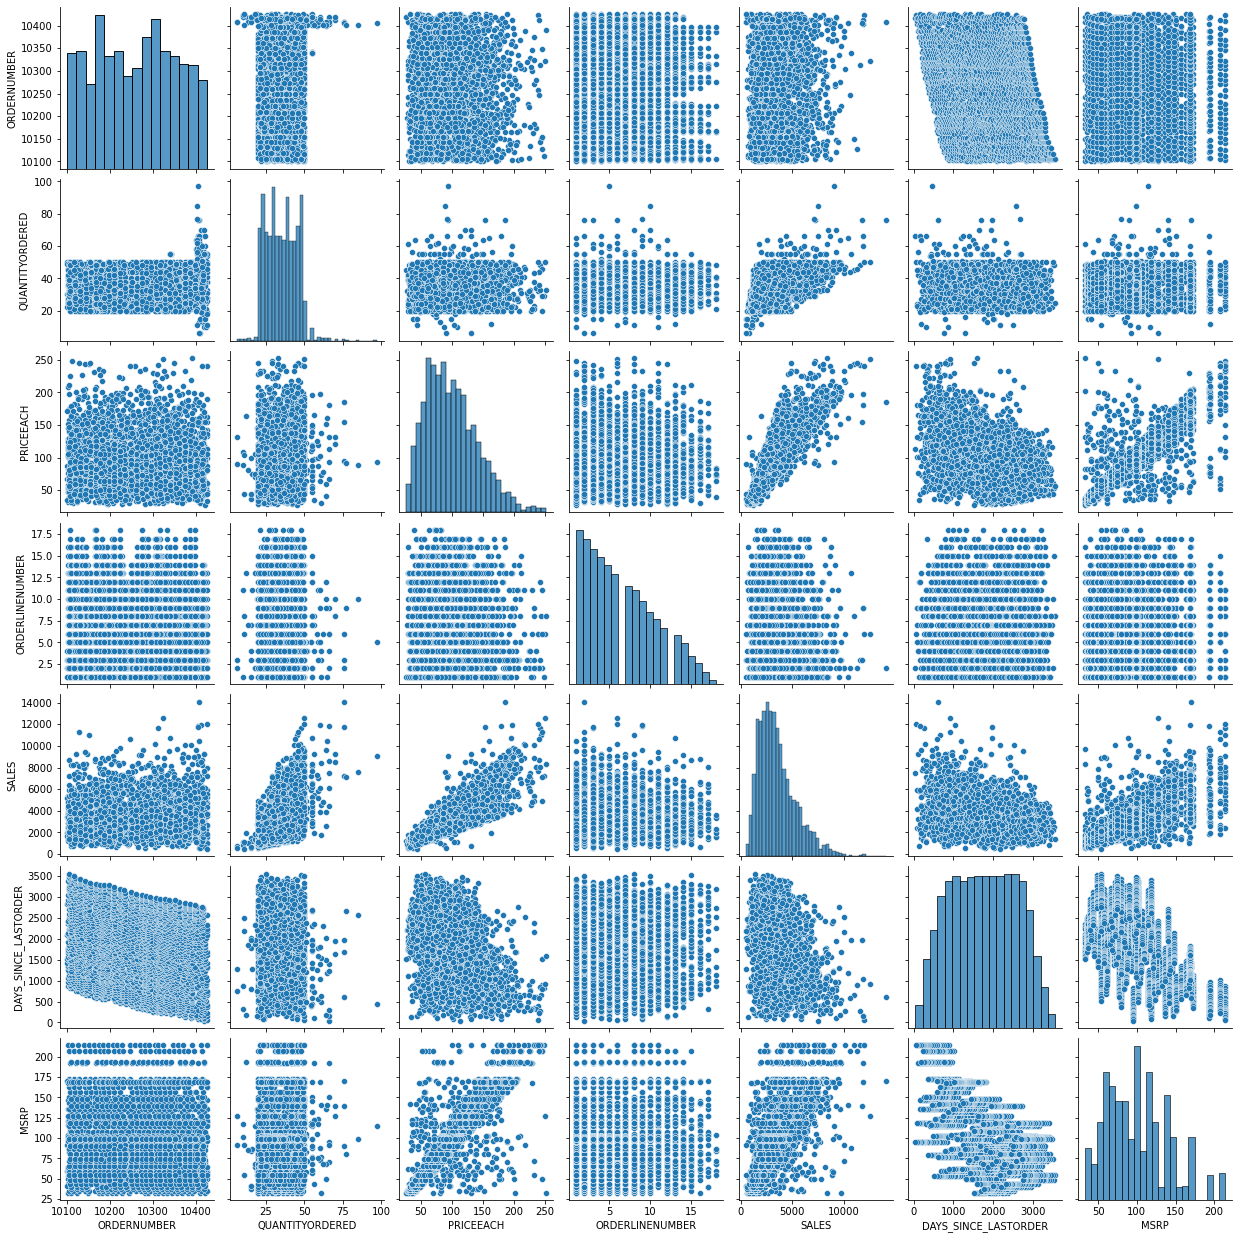

In [15]:
sns.pairplot(df)
fig.set_size_inches(12, 7)

In [16]:
df1=df.copy()

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [18]:
lratio,uratio=remove_outlier(df1['QUANTITYORDERED'])
df1['QUANTITYORDERED']=np.where(df1['QUANTITYORDERED']>uratio,uratio,df1['QUANTITYORDERED'])
df1['QUANTITYORDERED']=np.where(df1['QUANTITYORDERED']<lratio,lratio,df1['QUANTITYORDERED'])

lraxis,uraxis=remove_outlier(df1['PRICEEACH'])
df1['PRICEEACH']=np.where(df1['PRICEEACH']>uraxis,uraxis,df1['PRICEEACH'])
df1['PRICEEACH']=np.where(df1['PRICEEACH']<lraxis,lraxis,df1['PRICEEACH'])

lra,ura=remove_outlier(df1['SALES'])
df1['SALES']=np.where(df1['SALES']>ura,ura,df1['SALES'])
df1['SALES']=np.where(df1['SALES']<lra,lra,df1['SALES'])

lrs,urs=remove_outlier(df1['MSRP'])
df1['MSRP']=np.where(df1['MSRP']>urs,urs,df1['MSRP'])
df1['MSRP']=np.where(df1['MSRP']<lrs,lrs,df1['MSRP'])

<AxesSubplot:>

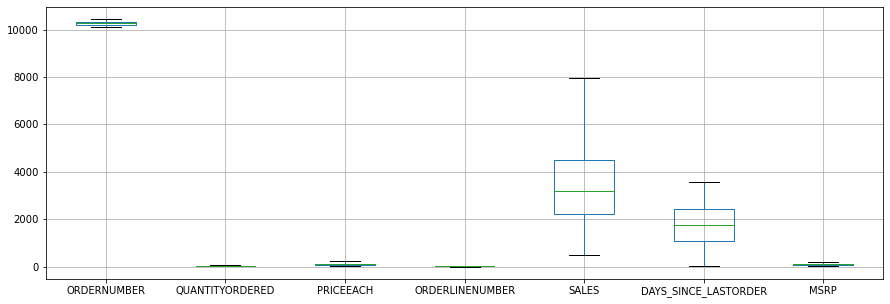

In [19]:
df1.boxplot(figsize=(15,5))

In [20]:
df1.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.062640,-0.003321,-0.054300,0.028217,-0.251476,-0.013858
QUANTITYORDERED,0.062640,1.000000,0.010018,-0.016372,0.550629,-0.021122,0.019799
PRICEEACH,-0.003321,0.010018,1.000000,-0.051670,0.814267,-0.397263,0.781075
ORDERLINENUMBER,-0.054300,-0.016372,-0.051670,1.000000,-0.055499,0.046615,-0.020874
SALES,0.028217,0.550629,0.814267,-0.055499,1.000000,-0.336058,0.645122
DAYS_SINCE_LASTORDER,-0.251476,-0.021122,-0.397263,0.046615,-0.336058,1.000000,-0.524044
MSRP,-0.013858,0.019799,0.781075,-0.020874,0.645122,-0.524044,1.000000


In [21]:
GFG = pd.ExcelWriter('Final.xlsx') 
df1.to_excel(GFG, index = False) 
GFG.save() 

In [22]:
df1.skew()

ORDERNUMBER            -0.006995
QUANTITYORDERED         0.205485
PRICEEACH               0.591875
ORDERLINENUMBER         0.575327
SALES                   0.784172
DAYS_SINCE_LASTORDER   -0.002983
MSRP                    0.554170
dtype: float64

<AxesSubplot:>

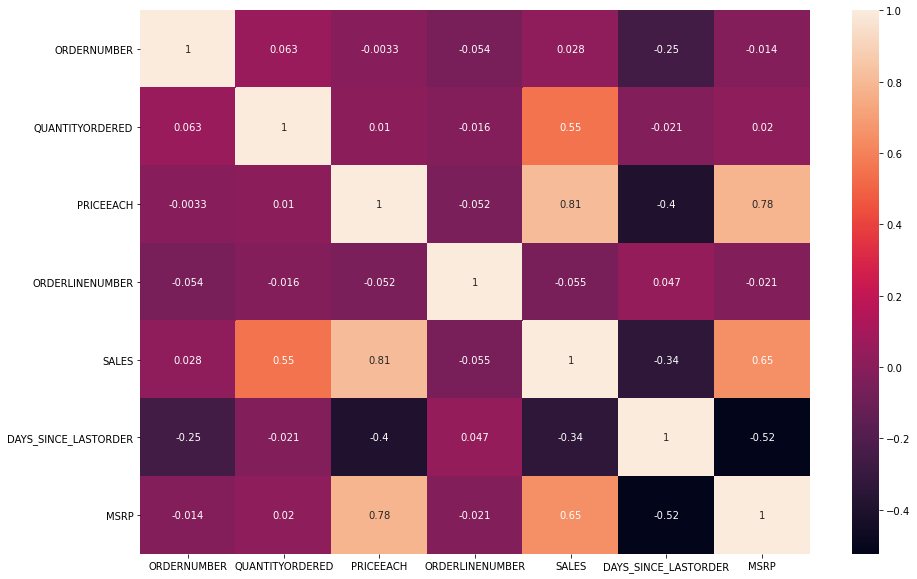

In [27]:
plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True)